### $\color{royalblue}{\text{Четврта вјежба из нумеричких метода у астрономији, датум: 08.01.2026.}} $

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from Splajn_interpolacija import spline_interp 
import random

#### $\color{magenta}{\text{СПЛАЈН}}$ интерполација.

За сваки интервал $[x_i,x_{i+1}]$ дефинише се кубни полином:

$$
S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3,
$$

гдје $i = 0, 1, ..., n-1$. 

Сплајн мора проћи кроз све чворове:

$$
S_i(x_i) = y_i \quad \text{и} \quad S_i(x_{i+1}) = y_{i+1}
$$

Из првог услова слиједи $a_i = y_i$. Функција мора бити непрекидна:

$$
S_{i-1}(x_i) = S_i(x_i) \quad \text{за } i = 1, 2, ..., n-1,
$$

а имамо и услове непрекидности првог извода:

$$
S'_{i-1}(x_i) = S'_i(x_i) \quad \text{за } i = 1, 2, ..., n-1,
$$

и другог извода:

$$
S''_{i-1}(x_i) = S''_i(x_i) \quad \text{за } i = 1, 2, ..., n-1.
$$

Изводи сплајна су дати преко релација:

$$
S'_i(x) = b_i + 2c_i(x - x_i) + 3d_i(x - x_i)^2,
$$
$$
S''_i(x) = 2c_i + 6d_i(x - x_i).
$$

Уколико је $h_i = x_{i+1} - x_i$ (ширина интервала), онда слиједи:

$$
S''_i(x_i) = 2c_i \quad \text{и} \quad S''_i(x_{i+1}) = 2c_i + 6d_i h_i.
$$

Пошто је $S''_i(x_{i+1}) = S''_{i+1}(x_{i+1}) = 2c_{i+1}$, добија се:

$$
2c_i + 6d_i h_i = 2c_{i+1}.
$$

Налазимо $d_i$ као:

$$
d_i = \frac{c_{i+1} - c_i}{3h_i}.
$$

Ово је баш дио из кода: `d[i] = (c[i+1] - c[i])/3/h[i]`.

Из непрекидности првог извода $S'_{i-1}(x_i) = S'_i(x_i)$ (услов *) слиједи:

$$
S'_{i-1}(x_i) = b_{i-1} + 2c_{i-1}h_{i-1} + 3d_{i-1}h_{i-1}^2,
$$

$$
S'_i(x_i) = b_i.
$$

Замјеном $d_i$ и расписивањем слиједи:

$$
S'_{i-1}(x) = b_{i-1} + 2c_{i-1}(x-x_{i-1}) + 3d_{i-1}(x-x_{i-1})^2,
$$

$$
S'_{i-1}(x_i) = b_{i-1} + 2c_{i-1}h_{i-1} + 3d_{i-1}h_{i-1}^2,
$$

$$
d_{i-1} = \frac{c_i - c_{i-1}}{3h_{i-1}}.
$$

Из услова интерполације $S_i(x_{i+1}) = y_{i+1}$ слиједи:

$$
a_i + b_i h_i + c_i h_i^2 + d_i h_i^3 = y_{i+1}.
$$

Замјеном $a_i = y_i$ и $d_i = \frac{c_{i+1} - c_i}{3h_i}$ произлази:

$$
b_i = \frac{y_{i+1} - y_i}{h_i} - \frac{h_i}{3}(2c_i + c_{i+1}).
$$

Поново се реферишемо на дио у коду `b[i] = (y[i+1]-y[i])/h[i] - h[i]/3*(2*c[i] + c[i+1])`.

Настављамо са рјешавањем *:

$$
b_{i-1} = \frac{y_i - y_{i-1}}{h_{i-1}} - \frac{h_{i-1}}{3}(2c_{i-1} + c_i),
$$

$$
b_{i-1} + 2c_{i-1}h_{i-1} + 3d_{i-1}h_{i-1}^2 = b_i,
$$

$$
b_{i-1} + 2c_{i-1}h_{i-1} + 3 \cdot \frac{c_i - c_{i-1}}{3h_{i-1}} \cdot h_{i-1}^2 = b_i,
$$

$$
b_{i-1} + 2c_{i-1}h_{i-1} + (c_i - c_{i-1})h_{i-1} = b_i,
$$

$$
b_{i-1} + 2c_{i-1}h_{i-1} + c_i h_{i-1} - c_{i-1}h_{i-1} = b_i,
$$

$$
b_{i-1} + c_{i-1}h_{i-1} + c_i h_{i-1} = b_i,
$$

$$
\frac{y_i - y_{i-1}}{h_{i-1}} - \frac{h_{i-1}}{3}(2c_{i-1} + c_i) + c_{i-1}h_{i-1} + c_i h_{i-1} = b_i.
$$

Узима се у обзир и $b_i = \frac{y_{i+1} - y_i}{h_i} - \frac{h_i}{3}(2c_i + c_{i+1})$, те слиједи:

$$
h_{i-1}c_{i-1} + 2(h_{i-1} + h_i)c_i + h_i c_{i+1} = 3\left(\frac{y_{i+1} - y_i}{h_i} - \frac{y_i - y_{i-1}}{h_{i-1}}\right).
$$

Пошто важе једнакости

$$
S''_0(x_0) = 0 \quad \text{и} \quad S''_{n-1}(x_n) = 0,
$$

добијамо:

$$
c_0 = 0 \quad \text{и} \quad c_n = 0.
$$

У коду је то `A[0,0] = 1; A[-1][-1] = 1;` са `v[0] = v[-1] = 0`.

Коначно, имамо сљедећи систем:

$$\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 \\
h_0 & 2(h_0+h_1) & h_1 & \cdots & 0 \\
0 & h_1 & 2(h_1+h_2) & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix}
\begin{bmatrix}
c_0 \\
c_1 \\
c_2 \\
\vdots \\
c_n
\end{bmatrix}
=
\begin{bmatrix}
0 \\
3\left(\frac{y_2-y_1}{h_1} - \frac{y_1-y_0}{h_0}\right) \\
3\left(\frac{y_3-y_2}{h_2} - \frac{y_2-y_1}{h_1}\right) \\
\vdots \\
0
\end{bmatrix}$$

Он се рјешава са `c = np.linalg.solve(A, v)`, да се нађу сви коефицијенти других извода.

**Поједностављно**, сплајн заправо даје једнакост:

$$
A\cdot C=v.
$$

Матрица $A$ је тзв. тридијагонална (три дијагонале имају ненулте елементе) матрица. Да се подсјетимо,

важи $S''(x_i)=2c_i\implies c_i=\frac{1}{2}S''(x_i)$. Овако добијамо директну информацију о закривљености сплајна

у сваком чвору. Коефицијенти $a_i$, $b_i$ и $d_i$ се онда налазе из приложених једнакости.



In [3]:
# модул Linear Algebra - брзински преглед

M = np.array([[6, 1, 1],
              [4, -2, 5],
              [2, 8, 7]])
 
print('Ранг:', np.linalg.matrix_rank(M))
print('Траг:', np.trace(M))
print('Детерминанта:', np.linalg.det(M))
print('Инверз:\n', np.linalg.inv(M))
print('Оригинална матрица на куб:\n', np.linalg.matrix_power(M, 3))


a = 2 + 3j
b = 4 + 5j
res = np.dot(a, b)
print('Скаларни производ комплексних бројева:', res)

res = np.vdot(a, b)
print('Векторски производ комплексних бројева:', res)

import numpy as np

a = np.array([[1, 2], [3, 4]])
b = np.array([8, 18])
print('Рјешење система Ax=b:', np.linalg.solve(a, b))

Ранг: 3
Траг: 11
Детерминанта: -306.0
Инверз:
 [[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]
Оригинална матрица на куб:
 [[336 162 228]
 [406 162 469]
 [698 702 905]]
Скаларни производ комплексних бројева: (-7+22j)
Векторски производ комплексних бројева: (23-2j)
Рјешење система Ax=b: [2. 3.]


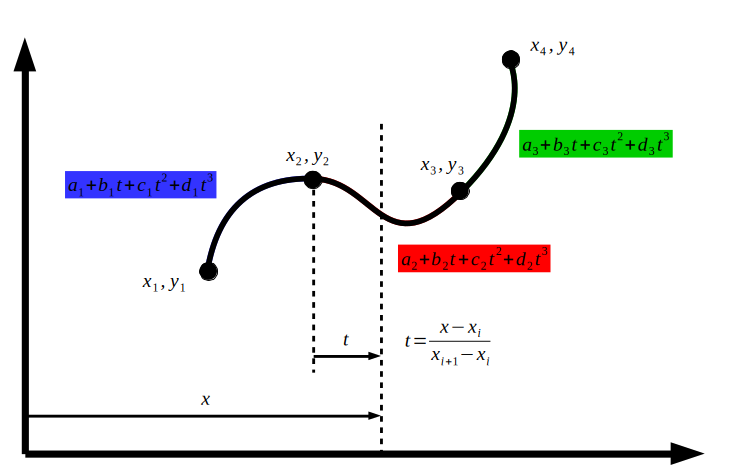

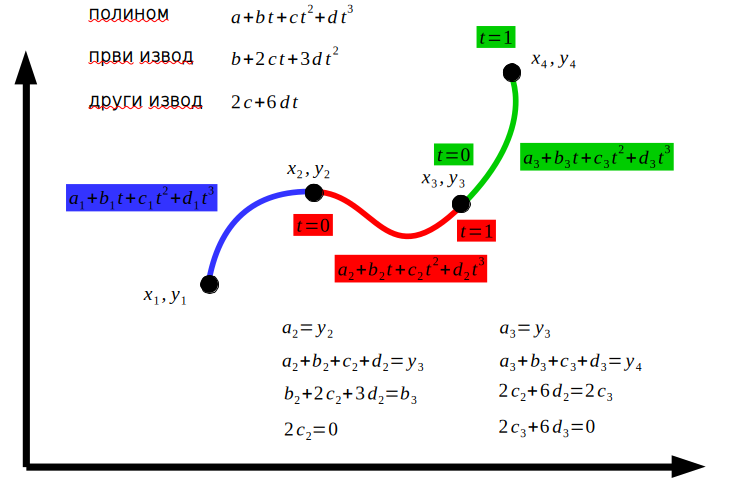

Прелазимо на имплементацију - добро познат примјер са хелиоцентричним растојањем Сатурна.

In [4]:
t, x, y, z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

t = t[0::10] 
x = x[0::10]
y = y[0::10]
z = z[0::10]

r = np.sqrt(x**2+y**2+z**2)

Тражено растојање је:  9.954 АЈ


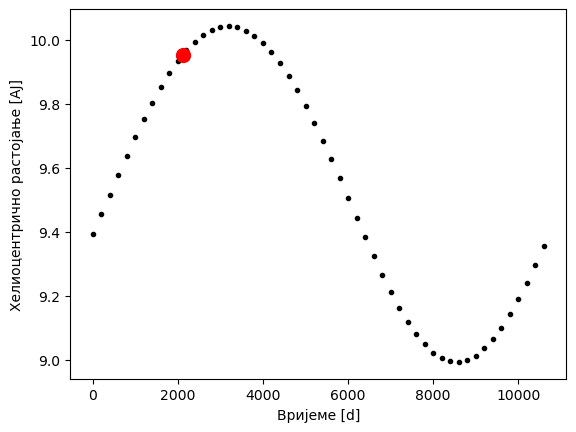

In [5]:
t0 = 2120
r0 = spline_interp(t, r, [t0])
print('Тражено растојање је: ', np.round(r0[0], 3), 'АЈ')

plt.plot(t, r, '.', color='black') 
plt.plot(t0, r0, 'o', color='red', markersize=10)
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

Поређење Сплајна и Лагранжовог интерполационог полинома.

537


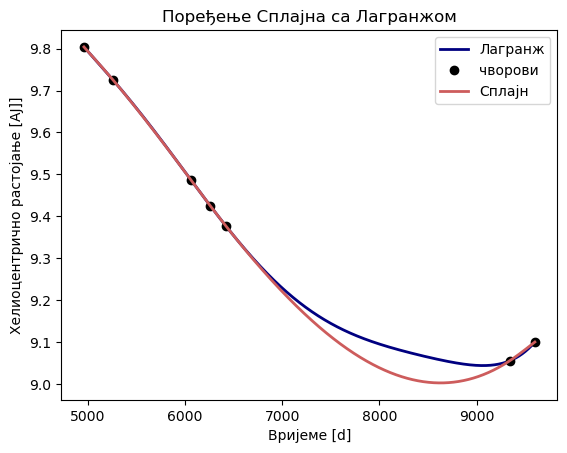

In [6]:
%run Interpolacioni_polinomi.ipynb 

t, x, y, z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)
print(len(t))
broj_covorova = 7
izbor_cvorova = random.sample(range(200, len(t)), broj_covorova)

izbor_cvorova.sort()

t = t[izbor_cvorova]
x = x[izbor_cvorova]
y = y[izbor_cvorova]
z = z[izbor_cvorova]

r = np.sqrt(x**2+y**2+z**2)

red = len(r)-1

tt = np.linspace(t[0], t[-1], 1000)

r_lagranz = lagranz(t, r, tt)
plt.plot(tt, r_lagranz, color='navy', label='Лагранж', lw=2)
plt.plot(t, r, 'o', color='black', label='чворови')

plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [АЈ]]')

r_splajn = spline_interp(t, r, tt)

plt.plot(tt, r_splajn, color='indianred', label='Сплајн', lw=2)

plt.title('Поређење Сплајна са Лагранжом')
plt.legend()
plt.show()

**Подсјетник**: Сплајн интерполација је веома ефикасна и функционише и са нееквидистантним аргументима. Промјена једног

чвора утиче само на локалне сегменте и нема Рунгеовог феномена. Међутим, меморијски је захтјевнија од претходно 

дискутованих полинома, и не ради добро ако је присутан шум у подацима.

---

*Дводимензионална* интерполација сплајном: хоћемо да одредимо надморску висину произвољног меридијана на Марсу

са неким кораком по латитуди. Проблем се своди на једнодимензионалну интерполацију.

(720, 1440)
(720, 1440) (720, 1440)


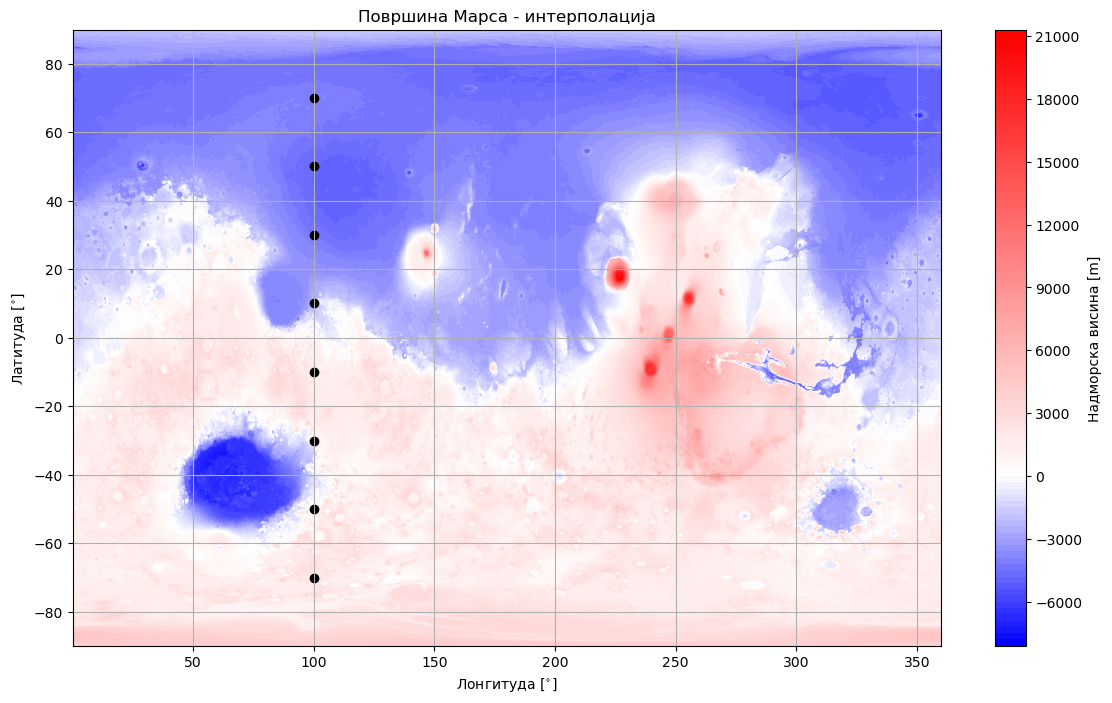

In [11]:
korak = 20 # корак по латитуди
longituda0 = 100 # лонгитуда на којој се траже надморске висине

latituda0 = np.arange(-90 + korak, 90, step = korak) 

h = np.loadtxt('topografija.dat', skiprows=2)
print(h.shape)

longituda = np.arange(0.125, 360, step = 0.25)
latituda = np.arange(-89.875, 90, step = 0.25)
longituda, latituda = np.meshgrid(longituda, latituda)

print(longituda.shape, latituda.shape)

plt.figure(figsize=(14, 8))
norm = mcolors.TwoSlopeNorm(vmin=h.min(), vcenter=0, vmax=h.max()) 
plt.contourf(longituda, latituda, h, 100, cmap='bwr', norm=norm)
plt.xlabel(r'Лонгитуда [$^{\circ}$]')
plt.ylabel(r'Латитуда [$^{\circ}$]')
plt.grid()
plt.colorbar(label='Надморска висина [m]')
plt.scatter(np.ones(len(latituda0))*longituda0, latituda0, marker='o', color='black')
plt.title('Површина Марса - интерполација')
plt.show()

Интерполација сплајном по произвољној лонгитуди.

/tmp/ipykernel_111614/3133817155.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  h_interp[i] = spline_interp(x, hh, [longituda0])


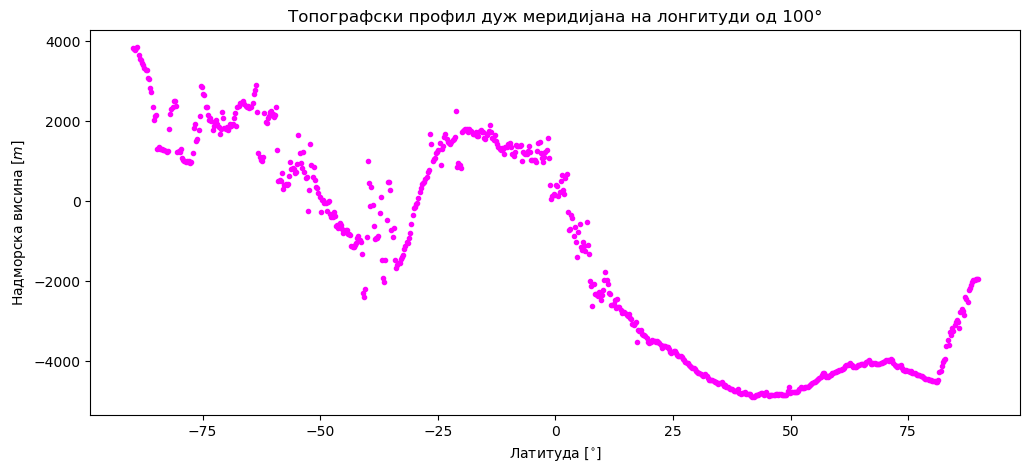

In [8]:
plt.figure(figsize=(12, 5))
x = np.arange(0.125, 360, step = 0.25) # лонгитуда
y = np.arange(-89.875, 90, step = 0.25) # латитуда

h_interp = np.zeros(len(y))
for i in range(len(y)):
    hh = h[i]
    h_interp[i] = spline_interp(x, hh, [longituda0])
    
plt.plot(y, h_interp, '.', color='magenta')
plt.xlabel(r'Латитуда [$^{\circ}$]')
plt.ylabel(r'Надморска висина [$m$]')
plt.title(f'Топографски профил дуж меридијана на лонгитуди од {longituda0}°')
plt.show()

"Додатна" интерполација.

8
720


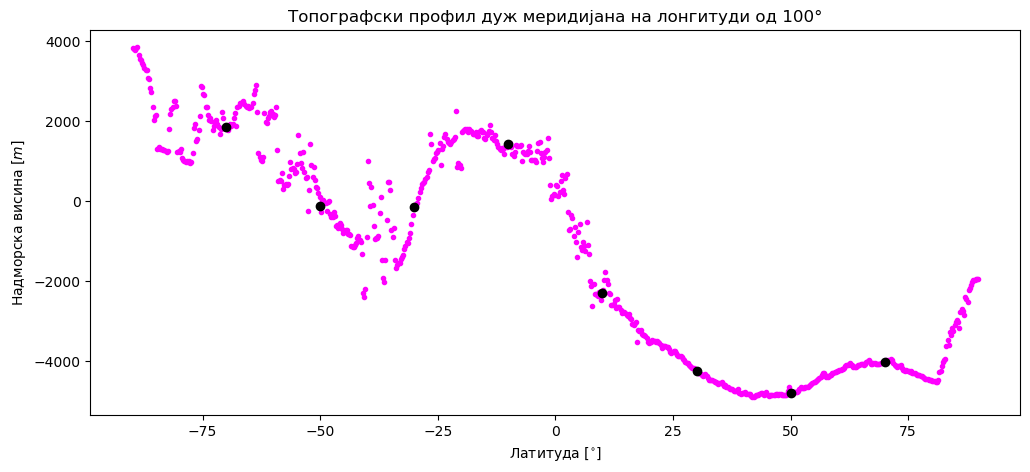

In [12]:
plt.figure(figsize=(12, 5))
h0 = spline_interp(y, h_interp, latituda0)
print(len(h0))
print(len(h_interp))
plt.plot(y, h_interp, '.', color='magenta')
plt.plot(latituda0, h0, 'o', color='black')

plt.xlabel(r'Латитуда [$^{\circ}$]')
plt.ylabel(r'Надморска висина [$m$]')
plt.title(f'Топографски профил дуж меридијана на лонгитуди од {longituda0}°')
plt.show()

 Можемо наћи тотално поједностављен висински профил.

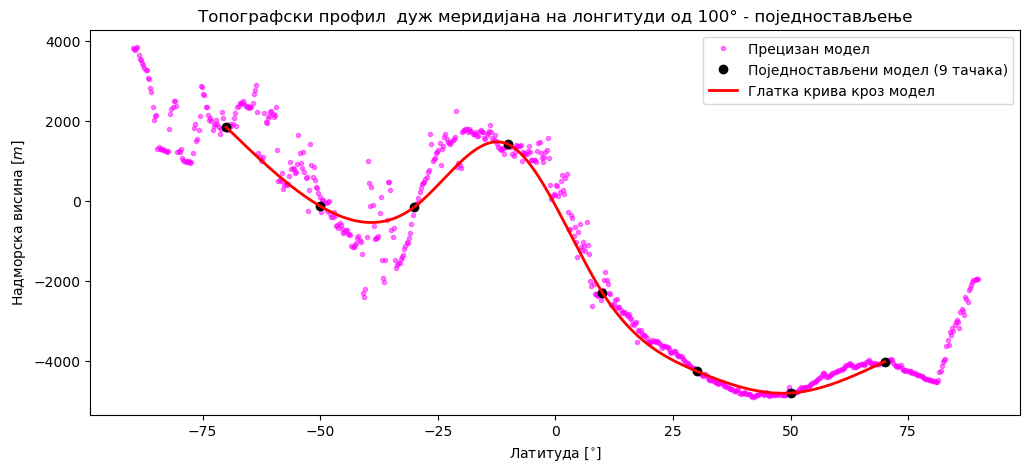

In [13]:
latitude_novo = np.linspace(latituda0.min(), latituda0.max(), 200)
h_novo = spline_interp(latituda0, h0, latitude_novo)

plt.figure(figsize=(12, 5))
plt.plot(y, h_interp, '.', color='magenta', alpha=0.5, label='Прецизан модел')
plt.plot(latituda0, h0, 'o', color='black', label='Поједностављени модел (9 тачака)')
plt.plot(latitude_novo, h_novo, '-', color='red', linewidth=2, label='Глатка крива кроз модел')
plt.xlabel(r'Латитуда [$^{\circ}$]')
plt.ylabel(r'Надморска висина [$m$]')
plt.title(f'Топографски профил  дуж меридијана на лонгитуди од {longituda0}° - поједностављење')
plt.legend()
plt.show()

### $\color{green}{\text{ЗАДАЦИ:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

1. Користећи фајл `Moon_crust.dat` наћи профиле дебљина Мјесечеве коре на латитудама $\phi=[-80°, -40°, 0°, 40°, 80°]$.

Профиле плотовати на истом графику.  Задатак урадити коришћењем сплајн интерполације. Даље, треба наћи максималне и 

минималне дебљине код кривих свих пет профила користећи `np.max` и `np.min`. Наћи профиле разлика између одређених

парова латитуда: $\phi=\pm80°$ и $\phi=0°$ (треба "одузети" назначене криве). На крају, израчунати коефицијенте корелације

између свих профила користећи `np.corrcoef`.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />